In [1]:

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
numdata = fetch_openml("mnist_784")


In [3]:
numdata.data.loc[1]
numdata

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

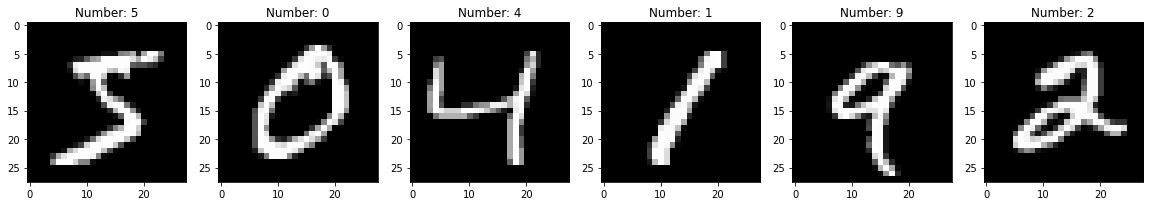

In [4]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(numdata.data.iloc[:6].values, numdata.target[:6])):
    plt.subplot(1, 6,index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap='gray')
    plt.title("Number: %s" % label)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(numdata.data, numdata.target, test_size=0.2)

In [6]:
logistic_regression = LogisticRegression(solver ='lbfgs')
logistic_regression.fit(X_train, y_train)

predictions = logistic_regression.predict(X_test)
score = logistic_regression.score(X_test, y_test)
print(score)

0.9240714285714285


C:\Users\TruAccount\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
logistic_regression.predict([X_test.iloc[0]])[0]

C:\Users\TruAccount\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'6'

Prediction: 9


C:\Users\TruAccount\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


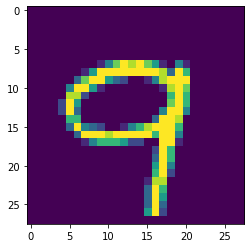

In [8]:
index = 6

plt.imshow(np.reshape(X_test.iloc[index].values, (28,28)))
print("Prediction: " + logistic_regression.predict([X_test.iloc[index]])[0])

In [9]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1374,    1,    3,    7,    1,    8,   10,    3,    5,    2],
       [   0, 1560,    7,    6,    0,    7,    0,    3,   21,    4],
       [   9,   17, 1269,   23,   14,    4,   15,   14,   39,   11],
       [   6,    6,   35, 1263,    1,   50,    3,   19,   23,    8],
       [   2,    4,   11,    3, 1247,    1,   14,    8,   12,   37],
       [  11,    5,   10,   44,   11, 1098,   22,    7,   43,    8],
       [   8,    5,   10,    2,   13,   16, 1327,    3,    7,    3],
       [   2,    7,   19,    8,    6,    1,    0, 1364,    1,   59],
       [   4,   19,   17,   28,    7,   31,    9,    5, 1223,   17],
       [   3,    2,    4,   14,   36,    8,    0,   41,   10, 1212]],
      dtype=int64)

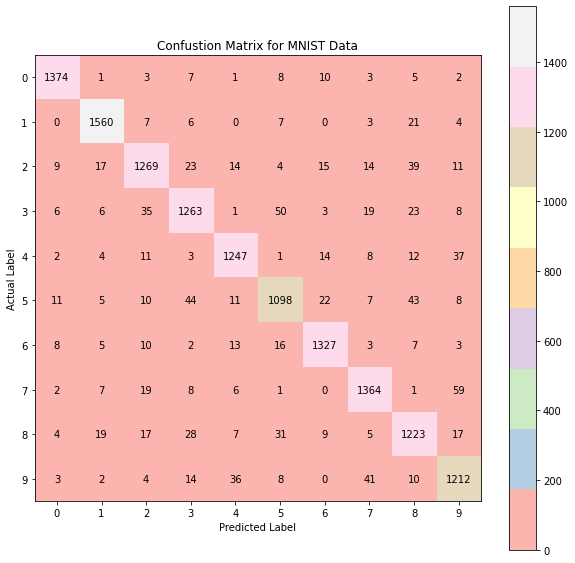

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap = "Pastel1")
plt.title('Confustion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.colorbar()
w, h = cm.shape
for x in range(w):
    for y in range(h):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment = "center", verticalalignment="center")